# LESSON 6: CROSS-VALIDATION 🔄
*Don't get fooled by lucky splits*

## What You'll Learn
- **Why single splits are unreliable** - Getting lucky ≠ having a good model
- **K-Fold CV** - Use ALL your data for both training and testing
- **Stratified CV** - Keep class balance (essential for classification!)
- **Model comparison** - Which model ACTUALLY performs better?

## Real Talk
You train a model, test it, get 95% accuracy. Ship it!

**In production:** 70% accuracy. What happened?

**You got lucky.** Your random test set was easy. Your model isn't as good as it seemed.

### The Single Split Trap
One train-test split is like judging a basketball player by watching them shoot **one free throw**.

Made it? "This player is perfect!"  
Missed it? "This player is terrible!"

**Obviously unreliable, right?** You need to see them shoot 10 times, 100 times!

**Same with models** - test them multiple ways before trusting them!

Let's learn how! 🚀

In [34]:
# Install required packages (run this first!)
import subprocess
import sys

packages = ['seaborn', 'scikit-learn', 'matplotlib', 'numpy', 'pandas']
print("Checking/installing packages...")
for package in packages:
    try:
        __import__(package.replace('-', '_'))
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
print("✓ All packages ready!\n")

# Setup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
    KFold
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load data
iris = load_iris()
X, y = iris.data, iris.target

print("🔄 Cross-Validation Notebook Loaded!")
print("Learn how to REALLY know if your model works!")
print(f"\nDataset: {len(X)} samples, {len(np.unique(y))} classes")

Checking/installing packages...
Installing scikit-learn...
✓ All packages ready!

🔄 Cross-Validation Notebook Loaded!
Learn how to REALLY know if your model works!

Dataset: 150 samples, 3 classes


## 📚 Step 1: Problem with Single Train-Test Split
*Getting lucky (or unlucky) with random splits*

⚠️ THE PROBLEM: Getting lucky (or unlucky) with the split
Single train-test split can be MISLEADING!

Testing same model with 10 different splits:

Split  1: 97.8% 🔥
Split  2: 95.6% 👍
Split  3: 97.8% 🔥
Split  4: 93.3% 👍
Split  5: 97.8% 🔥
Split  6: 91.1% 😐
Split  7: 93.3% 👍
Split  8: 88.9% 😐
Split  9: 88.9% 😐
Split 10: 97.8% 🔥

📊 Results:
  Lowest:  88.9%
  Highest: 97.8%
  Range:   8.9 percentage points!

❌ Problem:
  • Which score do you trust?
  • You might get LUCKY with an easy test set
  • Or UNLUCKY with a hard test set
  • Same model, wildly different scores!


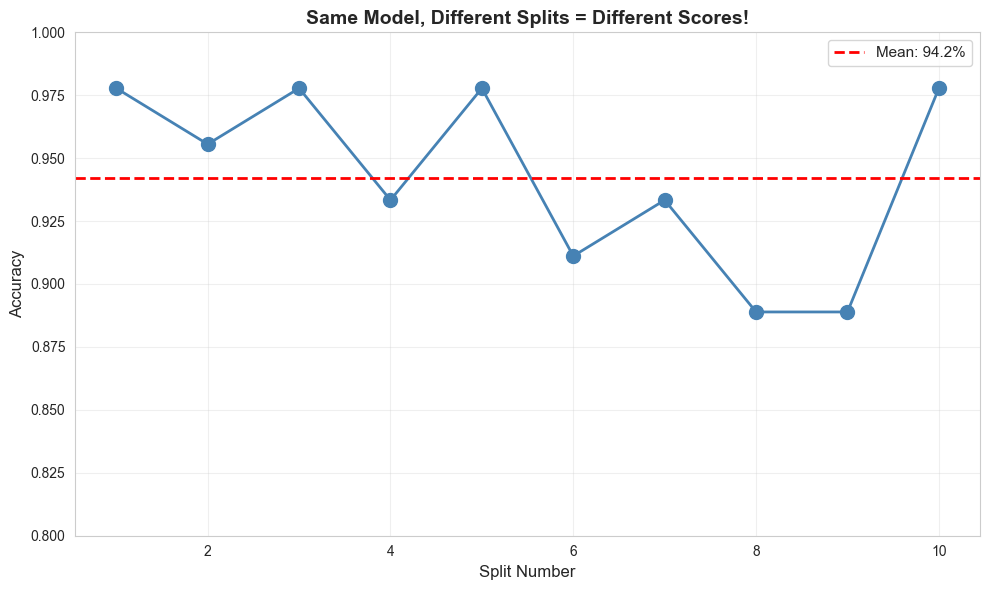


💡 Solution: Cross-Validation!


In [35]:
print("⚠️ THE PROBLEM: Getting lucky (or unlucky) with the split")
print("="*60)
print("Single train-test split can be MISLEADING!")
print()

model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Try 10 different random splits
scores = []
print("Testing same model with 10 different splits:\n")
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=i  # Different random state each time
    )
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)
    emoji = "🔥" if score > 0.96 else "👍" if score > 0.92 else "😐"
    print(f"Split {i+1:2d}: {score:.1%} {emoji}")

print(f"\n📊 Results:")
print(f"  Lowest:  {min(scores):.1%}")
print(f"  Highest: {max(scores):.1%}")
print(f"  Range:   {(max(scores) - min(scores))*100:.1f} percentage points!")

print(f"\n❌ Problem:")
print(f"  • Which score do you trust?")
print(f"  • You might get LUCKY with an easy test set")
print(f"  • Or UNLUCKY with a hard test set")
print(f"  • Same model, wildly different scores!")

# Visualize variation
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), scores, 'o-', markersize=10, linewidth=2, color='steelblue')
plt.axhline(y=np.mean(scores), color='r', linestyle='--', 
           linewidth=2, label=f'Mean: {np.mean(scores):.1%}')
plt.xlabel('Split Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Same Model, Different Splits = Different Scores!', fontsize=14, fontweight='bold')
plt.ylim(0.8, 1.0)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Solution: Cross-Validation!")

## 📊 Step 2: K-Fold Cross-Validation
*Use ALL data for both training and testing*

**What's K-Fold?** Split data into K equal parts (folds), then:
1. Train on K-1 folds, test on the remaining 1 fold
2. Repeat K times, each time using a different fold for testing  
3. Average all K scores for final estimate

**Example with K=5:**
- Fold 1: Train on folds 2,3,4,5 → test on fold 1
- Fold 2: Train on folds 1,3,4,5 → test on fold 2
- ... and so on

Every data point gets tested exactly once!

In [36]:
print("✅ SOLUTION: K-Fold Cross-Validation")
print("="*60)
print("Use ALL data for BOTH training and testing!")
print()

print("🔄 How it works:")
print("1. Split data into K parts (folds)")
print("2. Train K times, each time using different part as test")
print("3. Average the results")
print()

# 5-fold CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv)

print(f"5-Fold Cross-Validation Results:\n")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.1%}")

print(f"\n📊 Statistics:")
print(f"  Mean:   {cv_scores.mean():.1%}")
print(f"  Std:    {cv_scores.std():.1%}")
print(f"  Range:  {cv_scores.min():.1%} to {cv_scores.max():.1%}")

print(f"\n🧠 WHAT THIS MEANS:")
print(f"="*60)

print(f"\n📈 THE MEAN ({cv_scores.mean():.1%}):")
print(f"  • This is your BEST ESTIMATE of model performance")
print(f"  • Way more reliable than single split score")
print(f"  • Every data point got tested exactly once")

print(f"\n📉 THE STD ({cv_scores.std():.1%}):")
if cv_scores.std() < 0.02:
    print(f"  💪 VERY LOW! Model is super consistent")
    print(f"  → Performs similarly on different data subsets")
    print(f"  → You can trust this model!")
elif cv_scores.std() < 0.05:
    print(f"  👍 LOW. Model is pretty consistent")
    print(f"  → Some variation but acceptable")
else:
    print(f"  ⚠️  HIGH. Model performance varies a lot")
    print(f"  → Unstable predictions on different data")
    print(f"  → Might need more data or better features")

print(f"\n📊 THE RANGE ({cv_scores.min():.1%} to {cv_scores.max():.1%}):")
range_pct = (cv_scores.max() - cv_scores.min()) * 100
print(f"  • Difference: {range_pct:.1f} percentage points")
if range_pct < 3:
    print(f"  ✓ Tight range = consistent model!")
else:
    print(f"  ⚠️  Wide range = performance varies by fold")

print(f"\n✓ Now we can confidently say:")
print(f"  Model accuracy: {cv_scores.mean():.1%} ± {cv_scores.std():.1%}")
print(f"\n✓ Every sample was in test set exactly once")
print(f"✓ More reliable than single split!")
print(f"✓ Smaller variance = more consistent model")

✅ SOLUTION: K-Fold Cross-Validation
Use ALL data for BOTH training and testing!

🔄 How it works:
1. Split data into K parts (folds)
2. Train K times, each time using different part as test
3. Average the results

5-Fold Cross-Validation Results:

  Fold 1: 100.0%
  Fold 2: 96.7%
  Fold 3: 93.3%
  Fold 4: 90.0%
  Fold 5: 96.7%

📊 Statistics:
  Mean:   95.3%
  Std:    3.4%
  Range:  90.0% to 100.0%

🧠 WHAT THIS MEANS:

📈 THE MEAN (95.3%):
  • This is your BEST ESTIMATE of model performance
  • Way more reliable than single split score
  • Every data point got tested exactly once

📉 THE STD (3.4%):
  👍 LOW. Model is pretty consistent
  → Some variation but acceptable

📊 THE RANGE (90.0% to 100.0%):
  • Difference: 10.0 percentage points
  ⚠️  Wide range = performance varies by fold

✓ Now we can confidently say:
  Model accuracy: 95.3% ± 3.4%

✓ Every sample was in test set exactly once
✓ More reliable than single split!
✓ Smaller variance = more consistent model


## 📊 Step 3: Visualize K-Fold Splits
*Let's see exactly how the data gets divided*

### What are we visualizing?
**Each fold:**
- Uses 80% of data for training (green)
- Uses 20% of data for testing (red)
- Different 20% each time!

Remember: K-Fold splits your data into K equal parts (folds), then trains K different models.

**The magic:** After 5 folds, every single data point has been tested exactly once!

Let's see this visually:

📊 VISUALIZING K-FOLD SPLITS
Let's see EXACTLY how data is divided in 5-fold CV:

🧠 WHAT YOU'RE ABOUT TO SEE:
  • Each row = one fold (one training round)
  • Green cells = training data
  • Red cells = test data
  • Each sample (column) is tested exactly once!



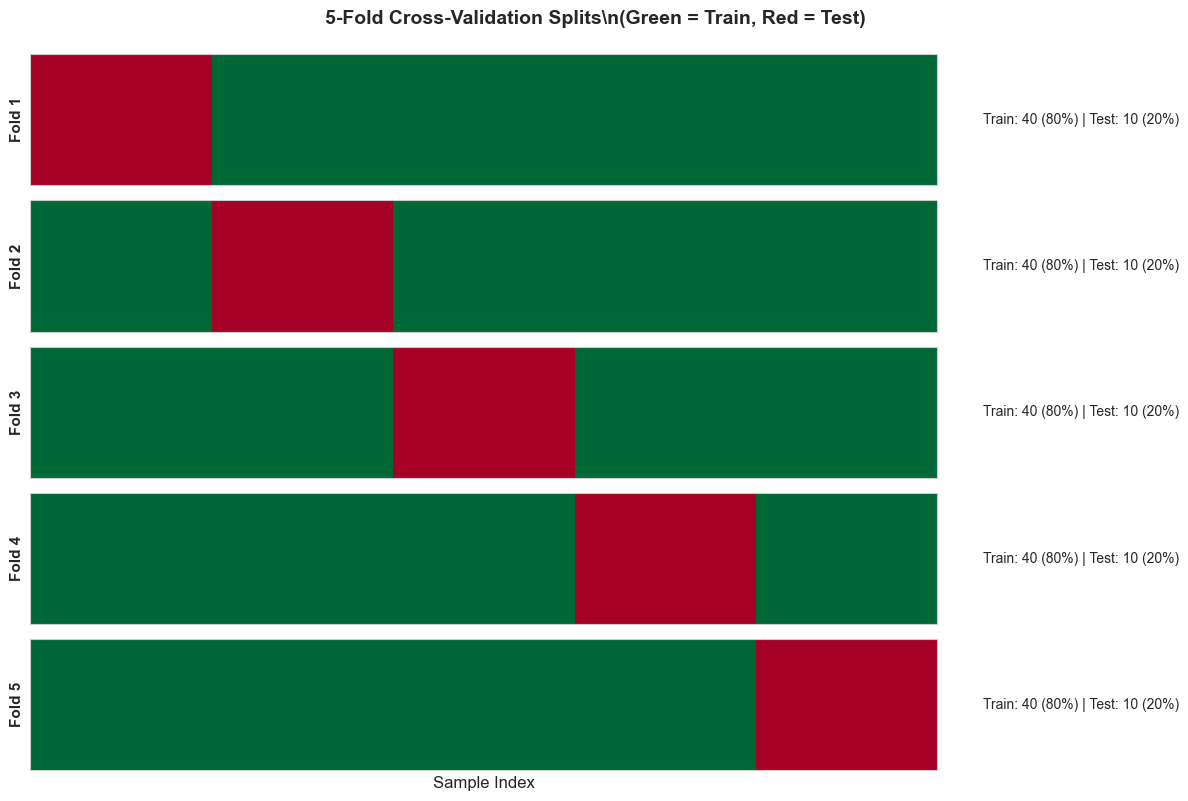

📚 How to read this:
  • Green = Training data (80% in each fold)
  • Red = Test data (20% in each fold)
  • Each sample is red (tested) exactly once!

🧠 KEY OBSERVATIONS:
  ✓ Fold 1: Tests samples 0-9 (first 20%)
  ✓ Fold 2: Tests samples 10-19 (second 20%)
  ✓ Fold 3: Tests samples 20-29 (third 20%)
  ✓ Fold 4: Tests samples 30-39 (fourth 20%)
  ✓ Fold 5: Tests samples 40-49 (last 20%)

💡 This is WAY better than single 80/20 split!
   → Single split: 20% of data NEVER gets tested
   → K-fold: 100% of data gets tested exactly once
   → More reliable performance estimate!


In [37]:
print("📊 VISUALIZING K-FOLD SPLITS")
print("="*60)
print("Let's see EXACTLY how data is divided in 5-fold CV:")
print()
print("🧠 WHAT YOU'RE ABOUT TO SEE:")
print("  • Each row = one fold (one training round)")
print("  • Green cells = training data")
print("  • Red cells = test data")
print("  • Each sample (column) is tested exactly once!")
print()

# Show how data is split
n_samples = 50  # Use small number for visualization
cv_viz = KFold(n_splits=5, shuffle=False)  # No shuffle to see pattern

fig, axes = plt.subplots(5, 1, figsize=(12, 8))

for i, (train_idx, test_idx) in enumerate(cv_viz.split(np.arange(n_samples))):
    # Create array showing train/test split
    split = np.zeros(n_samples)
    split[test_idx] = 1  # Test = 1, Train = 0
    
    # Plot
    axes[i].imshow([split], cmap='RdYlGn_r', aspect='auto')
    axes[i].set_ylabel(f'Fold {i+1}', fontsize=11, fontweight='bold')
    axes[i].set_yticks([])
    axes[i].set_xticks([])
    
    # Add text
    train_pct = len(train_idx) / n_samples * 100
    test_pct = len(test_idx) / n_samples * 100
    axes[i].text(n_samples + 2, 0, 
                f'Train: {len(train_idx)} ({train_pct:.0f}%) | Test: {len(test_idx)} ({test_pct:.0f}%)',
                va='center', fontsize=10)

axes[-1].set_xlabel('Sample Index', fontsize=12)
fig.suptitle('5-Fold Cross-Validation Splits\\n(Green = Train, Red = Test)', 
            fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("📚 How to read this:")
print("  • Green = Training data (80% in each fold)")
print("  • Red = Test data (20% in each fold)")
print("  • Each sample is red (tested) exactly once!")
print()
print("🧠 KEY OBSERVATIONS:")
print("  ✓ Fold 1: Tests samples 0-9 (first 20%)")
print("  ✓ Fold 2: Tests samples 10-19 (second 20%)")
print("  ✓ Fold 3: Tests samples 20-29 (third 20%)")
print("  ✓ Fold 4: Tests samples 30-39 (fourth 20%)")
print("  ✓ Fold 5: Tests samples 40-49 (last 20%)")
print()
print("💡 This is WAY better than single 80/20 split!")
print("   → Single split: 20% of data NEVER gets tested")
print("   → K-fold: 100% of data gets tested exactly once")
print("   → More reliable performance estimate!")

## 📊 Step 4: Stratified K-Fold
*Keep class proportions balanced*

### What's "Stratified" mean?
**Stratified K-Fold solution:**
- Ensures EVERY fold has the same % of each class
- If your data is 33% A, 33% B, 33% C...
- Every fold will ALSO be 33% A, 33% B, 33% C!
- Fair testing = reliable results

**Problem with regular K-Fold:**
- Might randomly put mostly Class A in Fold 1
- Mostly Class B in Fold 2
- Different class distributions = unfair comparison!

**Think of it like:** If you're testing a basketball player, you don't give them all easy shots in round 1 and all hard shots in round 2. You give them the SAME MIX every round. That's stratification!

Let's see the difference:

In [38]:
print("🎯 STRATIFIED K-FOLD: Keep class balance")
print("="*60)
print("ALWAYS use this for classification!")
print()
print("🧠 WHAT IS STRATIFIED?")
print("  Regular K-Fold: Randomly splits data (might be unbalanced)")
print("  Stratified: Ensures same % of each class in EVERY fold")
print()

# Regular K-Fold
regular_cv = KFold(n_splits=5, shuffle=True, random_state=42)
regular_scores = cross_val_score(model, X, y, cv=regular_cv)

# Stratified K-Fold  
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stratified_scores = cross_val_score(model, X, y, cv=stratified_cv)

print(f"Regular K-Fold:")
for i, score in enumerate(regular_scores, 1):
    print(f"  Fold {i}: {score:.1%}")
print(f"  Mean: {regular_scores.mean():.1%}  Std: {regular_scores.std():.2%}")

print(f"\nStratified K-Fold:")
for i, score in enumerate(stratified_scores, 1):
    print(f"  Fold {i}: {score:.1%}")
print(f"  Mean: {stratified_scores.mean():.1%}  Std: {stratified_scores.std():.2%}")

print(f"\n\n📈 COMPARISON BREAKDOWN:")
print(f"="*60)

print(f"\n📉 STANDARD DEVIATION (Consistency):")
print(f"  Regular:    {regular_scores.std():.4f}")
print(f"  Stratified: {stratified_scores.std():.4f}")
if stratified_scores.std() < regular_scores.std():
    improvement = (regular_scores.std() - stratified_scores.std()) / regular_scores.std() * 100
    print(f"  💪 Stratified is {improvement:.1f}% MORE consistent!")
    print(f"     → Less variation between folds")
    print(f"     → More trustworthy estimate")
else:
    print(f"  🤷 Similar consistency")

print(f"\n🎯 MEAN ACCURACY:")
print(f"  Regular:    {regular_scores.mean():.1%}")
print(f"  Stratified: {stratified_scores.mean():.1%}")
diff = abs(stratified_scores.mean() - regular_scores.mean())
if diff < 0.01:
    print(f"  ✓ Very similar mean performance")
else:
    print(f"  👀 Notable difference: {diff:.2%}")

print(f"\n\n🧠 WHY STRATIFIED IS BETTER:")
print(f"  • Balanced class distribution in EVERY fold")
print(f"  • No lucky/unlucky splits with uneven classes")
print(f"  • More reliable for imbalanced datasets")
print(f"  • Industry best practice for classification")

# Show class distribution in each fold
print(f"\n🔍 Class distribution per fold (Stratified):")
print("(Each fold should have similar class proportions)")
print()
for i, (train_idx, test_idx) in enumerate(stratified_cv.split(X, y), 1):
    test_classes = np.bincount(y[test_idx])
    total = len(test_idx)
    print(f"  Fold {i}: {test_classes} → ", end="")
    print(f"[{test_classes[0]/total:.1%}, {test_classes[1]/total:.1%}, {test_classes[2]/total:.1%}]")

print(f"\n🧠 ANALYSIS:")
print(f"="*60)
print(f"\n📊 WHAT YOU'RE SEEING:")
print(f"  • Each fold has ~33% of each class (balanced!)")
print(f"  • No fold is accidentally all one class")
print(f"  • Every fold is representative of full dataset")

print(f"\n⚠️  WHY THIS MATTERS:")
print(f"  WITHOUT stratification:")
print(f"    → Fold 1 might be 60% class A, 20% class B, 20% class C")
print(f"    → Fold 2 might be 10% class A, 70% class B, 20% class C")
print(f"    → Wildly different scores = unreliable estimate!")
print(f"\n  WITH stratification:")
print(f"    → Every fold is ~33% class A, ~33% class B, ~33% class C")
print(f"    → Consistent class distribution = reliable estimate!")

print(f"\n✓ Stratified keeps class balance in EVERY fold!")
print(f"✓ ALWAYS use StratifiedKFold for classification!")
print(f"✓ Prevents getting unlucky with imbalanced test sets")

🎯 STRATIFIED K-FOLD: Keep class balance
ALWAYS use this for classification!

🧠 WHAT IS STRATIFIED?
  Regular K-Fold: Randomly splits data (might be unbalanced)
  Stratified: Ensures same % of each class in EVERY fold

Regular K-Fold:
  Fold 1: 100.0%
  Fold 2: 96.7%
  Fold 3: 93.3%
  Fold 4: 90.0%
  Fold 5: 96.7%
  Mean: 95.3%  Std: 3.40%

Stratified K-Fold:
  Fold 1: 96.7%
  Fold 2: 96.7%
  Fold 3: 93.3%
  Fold 4: 100.0%
  Fold 5: 93.3%
  Mean: 96.0%  Std: 2.49%


📈 COMPARISON BREAKDOWN:

📉 STANDARD DEVIATION (Consistency):
  Regular:    0.0340
  Stratified: 0.0249
  💪 Stratified is 26.6% MORE consistent!
     → Less variation between folds
     → More trustworthy estimate

🎯 MEAN ACCURACY:
  Regular:    95.3%
  Stratified: 96.0%
  ✓ Very similar mean performance


🧠 WHY STRATIFIED IS BETTER:
  • Balanced class distribution in EVERY fold
  • No lucky/unlucky splits with uneven classes
  • More reliable for imbalanced datasets
  • Industry best practice for classification

🔍 Class dist

## 📊 Step 5: Comparing Multiple Models
*Which model is REALLY better?*

🏆 COMPARING MODELS - Which is REALLY better?
Use cross-validation to fairly compare different models!


📊 Testing each model across 5 folds...

🔄 Decision Tree:
    Fold 1: 96.7%
    Fold 2: 96.7%
    Fold 3: 93.3%
    Fold 4: 100.0%
    Fold 5: 93.3%
  ───────────────────
  Mean: 96.0%
  Std:  0.025
  ⚠️  Higher variation

🔄 Random Forest:
    Fold 1: 100.0%
    Fold 2: 96.7%
    Fold 3: 93.3%
    Fold 4: 96.7%
    Fold 5: 90.0%
  ───────────────────
  Mean: 95.3%
  Std:  0.034
  ⚠️  Higher variation

🔄 Logistic Regression:
    Fold 1: 100.0%
    Fold 2: 96.7%
    Fold 3: 93.3%
    Fold 4: 100.0%
    Fold 5: 93.3%
  ───────────────────
  Mean: 96.7%
  Std:  0.030
  ⚠️  Higher variation



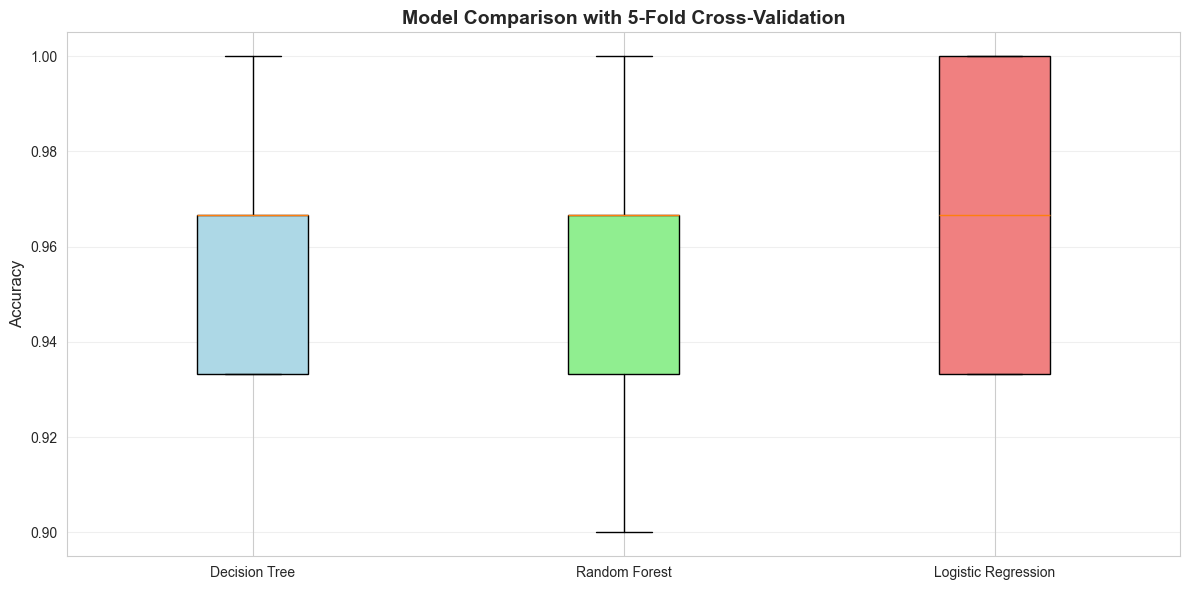


🏅 WINNER ANALYSIS

🥇 Best model: Logistic Regression
  Mean accuracy: 96.7%
  Std deviation: 3.0%
  Range: 93.3% to 100.0%


🧠 WHY IS THIS THE WINNER?
  ✓ Highest average performance across all 5 folds
  ✓ Tested on 100% of data (each sample tested once)
  ✓ No cherry-picking = honest assessment


📊 COMPLETE RANKING:
  🥇 1. Logistic Regression
      Accuracy: 96.67% ± 0.030
      ⚠️  Moderate variation
  🥈 2. Decision Tree
      Accuracy: 96.00% ± 0.025
      ⚠️  Moderate variation
  🥉 3. Random Forest
      Accuracy: 95.33% ± 0.034
      ⚠️  Moderate variation


💡 KEY INSIGHTS:
  • Box plot shows spread of scores across folds
  • Smaller boxes = more consistent model
  • Higher position = better average performance
  • Choose model with best balance of accuracy + consistency!

📊 Final Ranking:
  🥇 1. Logistic Regression  96.7% ± 3.0%
  🥈 2. Decision Tree        96.0% ± 2.5%
  🥉 3. Random Forest        95.3% ± 3.4%

💡 Look at BOTH mean and std:
   High mean = good performance
   Low s

In [42]:
print("🏆 COMPARING MODELS - Which is REALLY better?")
print("="*60)
print("Use cross-validation to fairly compare different models!")
print()

models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}
print("\n📊 Testing each model across 5 folds...\n")

for name, model in models.items():
    print(f"🔄 {name}:")
    scores = cross_val_score(model, X, y, cv=cv)
    results[name] = scores
    
    for i, score in enumerate(scores, 1):
        print(f"    Fold {i}: {score:.1%}")
    
    print(f"  ───────────────────")
    print(f"  Mean: {scores.mean():.1%}")
    print(f"  Std:  {scores.std():.3f}")
    
    if scores.std() < 0.01:
        print(f"  💪 SUPER CONSISTENT!")
    elif scores.std() < 0.02:
        print(f"  👍 Good consistency")
    else:
        print(f"  ⚠️  Higher variation")
    print()

# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))

positions = np.arange(len(models))
bp = ax.boxplot(results.values(), positions=positions, 
                tick_labels=results.keys(), patch_artist=True)

# Color boxes
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Comparison with 5-Fold Cross-Validation', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("🏅 WINNER ANALYSIS")
print("="*60)

best_model = max(results.items(), key=lambda x: x[1].mean())
print(f"\n🥇 Best model: {best_model[0]}")
print(f"  Mean accuracy: {best_model[1].mean():.1%}")
print(f"  Std deviation: {best_model[1].std():.1%}")
print(f"  Range: {best_model[1].min():.1%} to {best_model[1].max():.1%}")

print(f"\n\n🧠 WHY IS THIS THE WINNER?")
print(f"  ✓ Highest average performance across all 5 folds")
print(f"  ✓ Tested on 100% of data (each sample tested once)")
print(f"  ✓ No cherry-picking = honest assessment")

# Ranking
all_means = {name: scores.mean() for name, scores in results.items()}
sorted_models = sorted(all_means.items(), key=lambda x: x[1], reverse=True)

print(f"\n\n📊 COMPLETE RANKING:")
for rank, (name, score) in enumerate(sorted_models, 1):
    std = results[name].std()
    medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉"
    print(f"  {medal} {rank}. {name}")
    print(f"      Accuracy: {score:.2%} ± {std:.3f}")
    
    if std < 0.01:
        print(f"      💪 Super consistent!")
    elif std < 0.02:
        print(f"      👍 Good consistency")
    else:
        print(f"      ⚠️  Moderate variation")

print(f"\n\n💡 KEY INSIGHTS:")
print(f"  • Box plot shows spread of scores across folds")
print(f"  • Smaller boxes = more consistent model")
print(f"  • Higher position = better average performance")
print(f"  • Choose model with best balance of accuracy + consistency!")

print(f"\n📊 Final Ranking:")
for i, (name, mean) in enumerate(sorted_models, 1):
    std = results[name].std()
    emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉"
    print(f"  {emoji} {i}. {name:20s} {mean:.1%} ± {std:.1%}")

print("\n💡 Look at BOTH mean and std:")
print("   High mean = good performance")
print("   Low std = consistent/reliable")

### 🎯 CHALLENGE: Impact of K Value!

Want to see how the number of folds affects results?

**Try this:**
1. Change `n_splits=5` to `n_splits=3` or `n_splits=10`
2. Re-run the cross-validation
3. Compare the standard deviations

**Question:** Does more folds always give better estimates? What's the tradeoff?

**Hint:** More folds = more reliable estimate but slower training. Find the balance!

## 📊 Step 6: Cross-Validation Best Practices
*Everything you need to know in one place*

In [40]:
print("📚 CROSS-VALIDATION BEST PRACTICES")
print("="*60)
print()

print("1️⃣  NUMBER OF FOLDS:")
print("   • 5 folds: Good default (fast, reliable) ⭐ RECOMMENDED")
print("   • 10 folds: More thorough (slower, better for small datasets)")
print("   • Leave-one-out: Only for VERY small datasets")
print()
print("   🧠 WHY 5 FOLDS?")
print("      → Good balance: 80% train, 20% test each fold")
print("      → Fast enough for most datasets")
print("      → Reliable performance estimate")
print()

print("2️⃣  STRATIFICATION:")
print("   ✓ ALWAYS use StratifiedKFold for classification")
print("   ✓ Keeps class proportions balanced in every fold")
print("   ✓ Especially critical for imbalanced data")
print()
print("   🧠 WHY IT MATTERS:")
print("      → Without: One fold might be 90% class A, another 10%")
print("      → With: Every fold has same class distribution")
print("      → Result: More consistent, reliable scores")
print()

print("3️⃣  SHUFFLING:")
print("   ✓ Always shuffle=True (unless time-series)")
print("   ✓ Use random_state for reproducibility")
print("   ✓ Prevents order bias")
print()
print("   🧠 WHY SHUFFLE?")
print("      → Data might be sorted by class")
print("      → First fold would be all class A = BAD")
print("      → Shuffling randomizes order = FAIR splits")
print()

print("4️⃣  REPORTING:")
print("   ✓ Report mean AND standard deviation")
print("   ✓ Good: 'Accuracy: 92.3% ± 1.5%'")
print("   ✓ Bad:  'Accuracy: 92.3%'")
print("   ✓ Std shows consistency!")
print()
print("   🧠 WHAT THE NUMBERS MEAN:")
print("      92.3% = Expected performance on new data")
print("      ±1.5% = How much it might vary")
print("      Low std = Consistent, trustworthy model")
print()

print("5️⃣  MODEL COMPARISON:")
print("   ✓ Use SAME CV splits for all models")
print("   ✓ Compare both mean (performance) and std (consistency)")
print("   ✓ Consider statistical significance")
print("   ✓ Don't just pick highest mean!")
print()
print("   🧠 EXAMPLE:")
print("      Model A: 95.0% ± 5.0% (high but unstable)")
print("      Model B: 93.0% ± 1.0% (slightly lower but consistent)")
print("      → Model B might be better in production!")
print()

print("6️⃣  WHEN TO USE:")
print("   ✓ Small to medium datasets (< 100k samples)")
print("   ✓ Model selection / hyperparameter tuning")
print("   ✓ Getting reliable performance estimate")
print()
print("   ✗ Very large datasets (too slow, use simple split)")
print("   ✗ Time series (use time-based splits instead)")
print()

print("\n" + "="*60)
print("🎯 REMEMBER:")
print("  • Single split = might get lucky or unlucky")
print("  • Cross-validation = uses ALL data = more honest!")
print("  • Always report mean ± std for transparency")
print("  • Stratified K-Fold is your default for classification")
print("="*60)

# Quick reference table
import pandas as pd

cv_guide = pd.DataFrame({
    'Dataset Size': ['Small (<1k)', 'Medium (1k-100k)', 'Large (>100k)'],
    'Recommended Folds': ['10', '5', 'Simple split'],
    'Use Stratified?': ['Yes!', 'Yes!', 'Yes!'],
    'Why': [
        'More folds for small data',
        'Best balance: speed + accuracy',
        'CV too slow, 80/20 split OK'
    ]
})

print("\n📋 QUICK REFERENCE:")
print(cv_guide.to_string(index=False))

print("\n" + "="*60)
print("🧠 ANALYZING THE GUIDE:")
print("="*60)

print("\n📊 DATASET SIZE MATTERS:")
print("  • Small (<1k samples):")
print("    → Use 10 folds to maximize training data per fold")
print("    → Each fold tests only ~100 samples = need more folds")
print()
print("  • Medium (1k-100k samples):")
print("    → 5 folds is the sweet spot")
print("    → Fast enough + reliable enough")
print("    → Most common in practice")
print()
print("  • Large (>100k samples):")
print("    → CV becomes too slow (training 5+ models)")
print("    → Simple 80/20 split is fine (20k test samples is plenty!)")
print("    → Save time, same reliability")

print("\n\n" + "="*60)
print("🧠 LESSON COMPLETE - KEY TAKEAWAYS:")
print("="*60)
print("="*60)

print("\n1. SINGLE SPLIT = RISKY")
print("   ✗ Might get lucky/unlucky with random split")
print("   ✗ Results vary wildly")
print("   ✗ Can't trust single number")
print()
print("   💡 EXAMPLE:")
print("      Run 1: 95% accuracy (got lucky!)")
print("      Run 2: 87% accuracy (got unlucky!)")
print("      Which is real? You don't know!")

print("\n2. K-FOLD CROSS-VALIDATION = RELIABLE")
print("   ✓ Every sample tested exactly once")
print("   ✓ More stable performance estimate")
print("   ✓ Report: Mean ± Std")
print()
print("   💡 EXAMPLE:")
print("      Fold 1-5: [92%, 93%, 91%, 92%, 92%]")
print("      Mean: 92% ± 0.7% (consistent!)")
print("      Now you KNOW the model is reliable!")

print("\n3. ALWAYS USE STRATIFIED FOR CLASSIFICATION")
print("   ✓ Keeps class balance in every fold")
print("   ✓ Prevents unlucky imbalanced splits")
print("   ✓ More reliable than regular K-fold")
print()
print("   💡 WHY:")
print("      Regular: Fold 1 might be 80% class A")
print("      Stratified: Every fold is 33% A, 33% B, 33% C")
print("      → Consistent class distribution = fair test!")

print("\n4. COMPARING MODELS")
print("   ✓ Use same CV splits for fair comparison")
print("   ✓ Look at BOTH mean (accuracy) and std (consistency)")
print("   ✓ Higher mean + lower std = WINNER!")
print("   ✓ Use same CV splits")
print("   ✓ Look at mean AND variance")
print("   ✓ High mean + low variance = winner!")

print("\n5. BEST PRACTICES")
print("   • Default: 5-fold stratified CV")
print("   • Always shuffle (except time series)")
print("   • Report mean ± std")
print("   • Use for model selection")

print("\n🎉 Congratulations! You've completed ALL 6 lessons!")
print("\n🚀 You now know:")
print("   ✓ Classification metrics (accuracy, P/R/F1, confusion matrix)")
print("   ✓ Regression metrics (MAE, RMSE, R²)")
print("   ✓ Text classification (handling imbalance)")
print("   ✓ Text generation (BLEU, ROUGE)")
print("   ✓ Advanced classification (ROC, AUC, PR curves)")
print("   ✓ Cross-validation (making sure models ACTUALLY work)")
print("\n💪 You're ready to evaluate ML models like a pro!")

📚 CROSS-VALIDATION BEST PRACTICES

1️⃣  NUMBER OF FOLDS:
   • 5 folds: Good default (fast, reliable) ⭐ RECOMMENDED
   • 10 folds: More thorough (slower, better for small datasets)
   • Leave-one-out: Only for VERY small datasets

   🧠 WHY 5 FOLDS?
      → Good balance: 80% train, 20% test each fold
      → Fast enough for most datasets
      → Reliable performance estimate

2️⃣  STRATIFICATION:
   ✓ ALWAYS use StratifiedKFold for classification
   ✓ Keeps class proportions balanced in every fold
   ✓ Especially critical for imbalanced data

   🧠 WHY IT MATTERS:
      → Without: One fold might be 90% class A, another 10%
      → With: Every fold has same class distribution
      → Result: More consistent, reliable scores

3️⃣  SHUFFLING:
   ✓ Always shuffle=True (unless time-series)
   ✓ Use random_state for reproducibility
   ✓ Prevents order bias

   🧠 WHY SHUFFLE?
      → Data might be sorted by class
      → First fold would be all class A = BAD
      → Shuffling randomizes order = 